In [2]:
import os
import time
import numpy as np
import matplotlib.pyplot as plt
    
def isNewData(oldTimestamp):                # you don't need this function
    file = open("output.txt","r")
    data = file.read()
    if data == "":
        return False
    #print(data)
    cells = data.splitlines()[-1].split()
    if cells[0] != "DONE":
        return False
    if int(cells[1]) <= oldTimestamp:
        return False    
    return True

def executeCommand(command):               # you rather don't need this function
    file = open("commands.txt","w")
    file.write(command)
    file.close()
    time.sleep(0.2)
    
def executeCommandAndWaitUntilReady(command):    # you need this function
    file = open("commands.txt","w")
    oldTimestamp = round(time.time() * 1000)
    file.write(command)
    file.close()
    time.sleep(0.1)
    while False==isNewData(oldTimestamp):
        time.sleep(0.1)
    
def getDataOutput():                    # get output of kernel, whatever it is
    file = open("output.txt","r")
    data = file.read().splitlines()[0]
    file.close()
    return data.split()

def getDataOutputF():                    # get output of kernel and convert to float 
    file = open("output.txt","r")
    data = file.read().splitlines()[0]
    file.close()
    out = []
    for x in data.split():
        if "(" in x:
            x = x.replace("(","")
            x = x.replace(")","")
            r = float(x.split(",")[0])
            i = float(x.split(",")[1])
            out.append(r+1j*i)
        else:
            out.append(float(x))
    return out

def getDataOutputFR():                  # get output of kernel and convert to float (only real part)
    file = open("output.txt","r")
    data = file.read().splitlines()[0]
    file.close()
    out = []
    for x in data.split():
        if "(" in x:
            x = x.replace("(","")
            x = x.replace(")","")
            r = float(x.split(",")[0])
            i = float(x.split(",")[1])
            out.append(r)
        else:
            out.append(float(x))
    return out

In [233]:
executeCommandAndWaitUntilReady("print_memory ;")
print( getDataOutput() )
energies = {}
momentums = {}

['Mem:', '404[MB],', 'Mem', 'max:', '592[MB]']


In [245]:
N,Ns,U,Ω,PBC=3,20,'inf',0.01,1

In [246]:
if U == 'inf':
    executeCommandAndWaitUntilReady("generate_base base "+str(Ns)+" "+str(N)+" 1 ;")
    print("A",end='')
    executeCommandAndWaitUntilReady("generate_operator_RBHH base H -1 0 "+str(Ω)+" 0 "+str(PBC)+" ;") 
    print("B",end='')
else:
    executeCommandAndWaitUntilReady("generate_base base "+str(Ns)+" "+str(N)+" ;")
    print("A",end='')
    executeCommandAndWaitUntilReady("generate_operator_RBHH base H -1 "+str(U)+" "+str(Ω)+" 0 "+str(PBC)+" ;") 
    print("B",end='')
executeCommandAndWaitUntilReady("generate_operator_Momentum base M "+str(PBC)+" ;")
print("C",end='')
executeCommandAndWaitUntilReady("compute_eigenstates H 0 -1 ;")
print("D",end='')
executeCommandAndWaitUntilReady("compute_expected_value H H_eigenstates ;")
energies[str(N)+"_"+str(Ns)+"_"+str(U)+"_"+str(Ω)] = getDataOutputFR() 
print("E",end='')
executeCommandAndWaitUntilReady("compute_expected_value M H_eigenstates ;")
momentums[str(N)+"_"+str(Ns)+"_"+str(U)+"_"+str(Ω)] = getDataOutputFR() 
print("F",end='')
executeCommandAndWaitUntilReady("clear_workspace ;")

ABCDEF

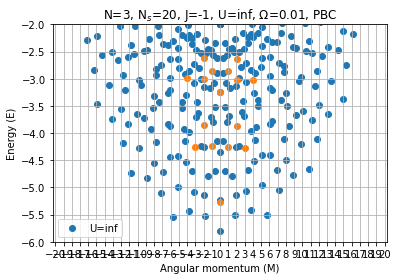

In [253]:
def plotScatter(N,Ns,U,Ω):   
    scaledMoementums = [M/(2*np.pi)*Ns for M in momentums[str(N)+"_"+str(Ns)+"_"+str(U)+"_"+str(Ω)]]
    plt.scatter(scaledMoementums,energies[str(N)+"_"+str(Ns)+"_"+str(U)+"_"+str(Ω)],label="U="+str(U))

plotScatter(N=3,Ns=20,U='inf',Ω=0.01)
#plotScatter(N=2,Ns=10,U=1.01,Ω=0)
plt.xlabel("Angular momentum (M)")
plt.ylabel("Energy (E)")
plt.title("N="+str(N)+", N$_s$="+str(Ns)+", J=-1, U="+str(U)+", Ω="+str(Ω)+", PBC")
plt.ylim([-6,-2])
#plt.xlim([-7,7])
plt.xticks(np.arange(-20, 21, 1.0))
plt.grid()
plt.legend()

refData = np.loadtxt("refData")
plt.scatter(refData[:,0],refData[:,1])
plt.show()